In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for CNN (28x28 grayscale images)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical for CNN
y_train_cnn = keras.utils.to_categorical(y_train, 10)
y_test_cnn = keras.utils.to_categorical(y_test, 10)

# Reshape for KNN and SVM (Flatten 28x28 images into 1D vectors)
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # (60000, 784)
x_test_flat = x_test.reshape(x_test.shape[0], -1)      # (10000, 784)

print(f"Shape of x_train for CNN: {x_train_cnn.shape}")
print(f"Shape of x_train for KNN/SVM: {x_train_flat.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shape of x_train for CNN: (60000, 28, 28, 1)
Shape of x_train for KNN/SVM: (60000, 784)


In [3]:
# Build CNN Model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the CNN Model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN Model
cnn_history = cnn_model.fit(x_train_cnn, y_train_cnn, epochs=5, batch_size=128, validation_data=(x_test_cnn, y_test_cnn))
cnn_model.save("handwritten_digit_model.h5")
# Evaluate CNN Model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_cnn)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 98ms/step - accuracy: 0.8135 - loss: 0.5997 - val_accuracy: 0.9788 - val_loss: 0.0646
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9698 - loss: 0.1024 - val_accuracy: 0.9848 - val_loss: 0.0433
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.9777 - loss: 0.0774 - val_accuracy: 0.9878 - val_loss: 0.0347
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9822 - loss: 0.0605 - val_accuracy: 0.9900 - val_loss: 0.0306
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.9850 - loss: 0.0490 - val_accuracy: 0.9904 - val_loss: 0.0264


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9875 - loss: 0.0325
CNN Test Accuracy: 0.9904


In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat, y_train)

# Train SVM Model
svm = SVC(kernel='linear')
svm.fit(x_train_flat, y_train)


# Step 3: Evaluation & Optimization
print("CNN Accuracy:", cnn_model.evaluate(x_test_cnn, y_test_cnn)[1]) # Changed y_test to y_test_cnn
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(x_test_flat)))
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(x_test_flat)))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9875 - loss: 0.0325
CNN Accuracy: 0.9904000163078308
KNN Accuracy: 0.9705
SVM Accuracy: 0.9404


In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile & Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Save Model
model.save("/content/handwritten_digit_model.h5")
print("✅ Model trained & saved as mnist_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9081 - loss: 0.2993 - val_accuracy: 0.9817 - val_loss: 0.0554
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9852 - loss: 0.0510 - val_accuracy: 0.9850 - val_loss: 0.0448
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9857 - val_loss: 0.0426
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9865 - val_loss: 0.0370
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 0.9860 - val_loss: 0.0442


✅ Model trained & saved as mnist_model.h5


In [6]:
!pip install pillow numpy matplotlib


Saving a-dark-metal-number-four-pictured-on-paper-containing-other-numbers-B0N18P.jpg to a-dark-metal-number-four-pictured-on-paper-containing-other-numbers-B0N18P.jpg
✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


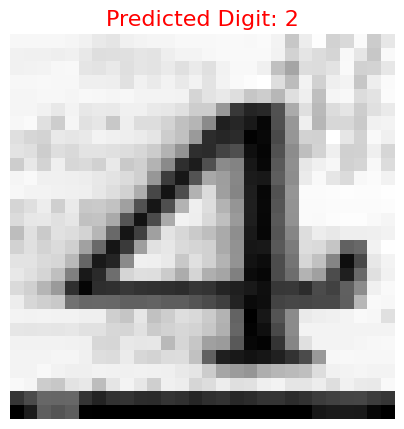

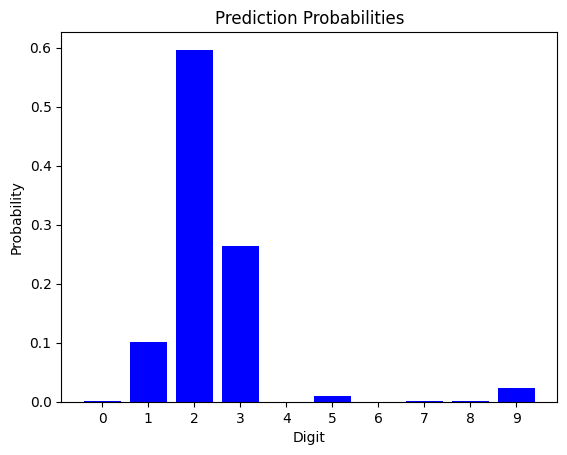

In [7]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ✅ Step 1: Upload an Image
uploaded = files.upload()  # Open file upload dialog
image_path = list(uploaded.keys())[0]

# ✅ Step 2: Load the Trained Model
try:
    model = tf.keras.models.load_model("/content/handwritten_digit_model.h5")  # Change to your model path
    print("✅ Model loaded successfully!")
except Exception as e:
    print("❌ Model file not found! Train & save your model first.")
    raise

# ✅ Step 3: Load & Preprocess the Uploaded Image
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to 28x28
img_array = np.array(img) / 255.0  # Normalize pixel values (0 to 1)
img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for the model

# ✅ Step 4: Predict the Handwritten Digit
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)  # Get the digit with highest probability

# ✅ Step 5: Display Image & Prediction Clearly
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap="gray")  # Show uploaded digit
plt.title(f"Predicted Digit: {predicted_label}", fontsize=16, color="red")
plt.axis("off")
plt.show()

# ✅ Step 6: Show Prediction Probabilities (Optional)
plt.bar(range(10), prediction[0], color='blue')
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.title("Prediction Probabilities")
plt.xticks(range(10))  # Show digits 0-9
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 121s 238ms/step - accuracy: 0.8381 - loss: 0.5254 - val_accuracy: 0.9406 - val_loss: 0.1938
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 199ms/step - accuracy: 0.9693 - loss: 0.1034 - val_accuracy: 0.9832 - val_loss: 0.0607


✅ Model trained & saved successfully!


Saving a-dark-metal-number-four-pictured-on-paper-containing-other-numbers-B0N18P.jpg to a-dark-metal-number-four-pictured-on-paper-containing-other-numbers-B0N18P (1).jpg
✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


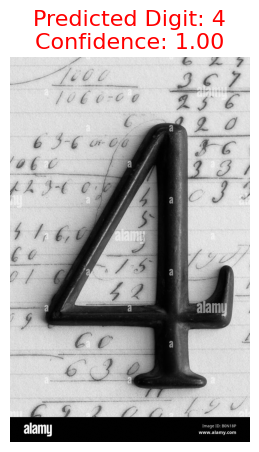

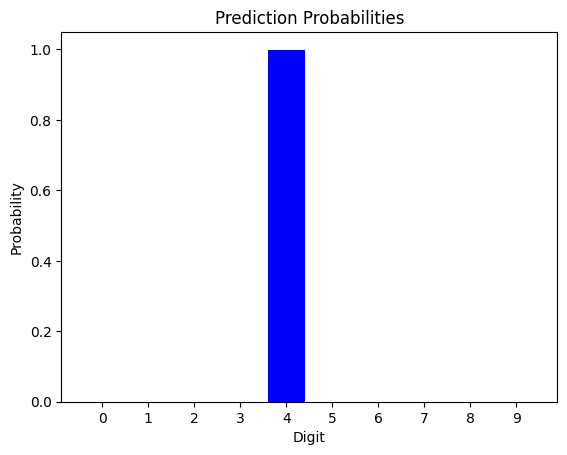

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from google.colab import files
from PIL import Image
import cv2

# ✅ Step 1: Load & Preprocess MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# ✅ Step 2: Data Augmentation (For Better Generalization)
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

# ✅ Step 3: Improved CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile & Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=2, validation_data=(x_test, y_test))

# Save Model
model.save("/content/handwritten_digit_model.h5")
print("✅ Model trained & saved successfully!")

# ✅ Step 4: Upload & Preprocess Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

try:
    model = tf.keras.models.load_model("/content/handwritten_digit_model.h5")
    print("✅ Model loaded successfully!")
except Exception as e:
    print("❌ Model file not found! Train & save your model first.")
    raise

def preprocess_image(image_path):
    """Loads and preprocesses the uploaded image for better accuracy."""
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))

    # Convert to NumPy array & apply denoising operations
    img_array = np.array(img)
    img_array = cv2.GaussianBlur(img_array, (3,3), 0)  # Reduce noise
    _, img_array = cv2.threshold(img_array, 128, 255, cv2.THRESH_BINARY_INV)  # Enhance contrast
    img_array = img_array / 255.0

    return img_array.reshape(1, 28, 28, 1)

# Preprocess Image
img_array = preprocess_image(image_path)

# ✅ Step 5: Predict & Adjust Based on Confidence
prediction = model.predict(img_array)
confidence = np.max(prediction)
predicted_label = np.argmax(prediction)

# If confidence is too low (<50%), take second-best guess
if confidence < 0.5:
    second_best = np.argsort(prediction[0])[-2]
    print(f"⚠️ Low confidence ({confidence:.2f}), alternative prediction: {second_best}")
    predicted_label = second_best

# ✅ Step 6: Display Image & Prediction Clearly
plt.figure(figsize=(5, 5))
plt.imshow(Image.open(image_path).convert("L"), cmap="gray")
plt.title(f"Predicted Digit: {predicted_label}\nConfidence: {confidence:.2f}", fontsize=16, color="red")
plt.axis("off")
plt.show()

# ✅ Step 7: Show Prediction Probabilities
plt.bar(range(10), prediction[0], color='blue')
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.title("Prediction Probabilities")
plt.xticks(range(10))
plt.show()
